# Week 9: Clustering of Masaeli et al.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

mat = pd.read_csv('WBC.csv')
mat.drop('Unnamed: 0', axis=1, inplace=True)
mat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,Sample
0,7.705763e+00,0.991449,0.023529,41.733333,1.048193,43.5,5,68.713823,0.781410,0.869809,41.605769,5.0,0.999950,50.6,11,56.8,9,5,0.000000,WBC
1,2.966765e+02,3.069244,0.515789,55.275000,3.130435,108.0,155,271.802401,0.885943,0.820493,56.551683,5.0,0.893470,76.3,8,668.3,9,25,0.037783,WBC
2,5.374849e+02,1.001452,0.058824,42.800000,1.125000,40.5,280,75.633843,0.843340,0.835149,42.076923,5.0,0.999243,50.5,7,36.6,11,3,0.000000,WBC
3,7.012356e+02,1.130061,0.107527,46.266667,1.240964,51.5,365,90.187681,0.705554,0.846169,47.645833,5.0,0.999204,60.4,6,62.7,7,11,0.021176,WBC
4,7.205000e+02,0.995128,0.023256,39.875000,1.047619,44.0,375,65.618147,0.847418,0.831938,44.894231,4.5,0.989088,73.4,9,40.5,8,7,0.000000,WBC
5,7.686615e+02,1.304228,0.135135,43.271429,1.312500,42.0,400,89.211414,0.877270,0.864886,44.686813,4.0,0.998182,65.4,7,121.2,8,8,0.038700,WBC
6,7.975595e+02,1.022628,0.030303,34.714286,1.062500,42.5,415,57.937140,0.836032,0.911274,38.791209,5.0,0.999787,45.5,9,49.7,8,3,0.000000,WBC
7,8.553537e+02,1.162681,0.111111,43.662500,1.250000,52.5,445,85.731118,0.891955,0.894780,47.659856,4.5,0.999968,62.8,7,56.5,12,7,0.016292,WBC
8,9.324122e+02,1.295308,0.133690,42.400000,1.308642,53.0,485,87.157864,0.854163,0.873109,44.052885,4.5,0.999189,57.9,11,62.6,7,17,0.036176,WBC
9,9.516766e+02,1.505374,0.205357,52.980000,1.516854,67.5,495,126.233782,0.921153,0.922193,53.873077,5.0,0.995787,50.8,7,91.7,9,12,0.019589,WBC


#### (1) Choose any two variables and plot them against cell identity (in color). Do you see clear separation of these classes? What does this tell you about whether or not you can classify the cells if differing type?

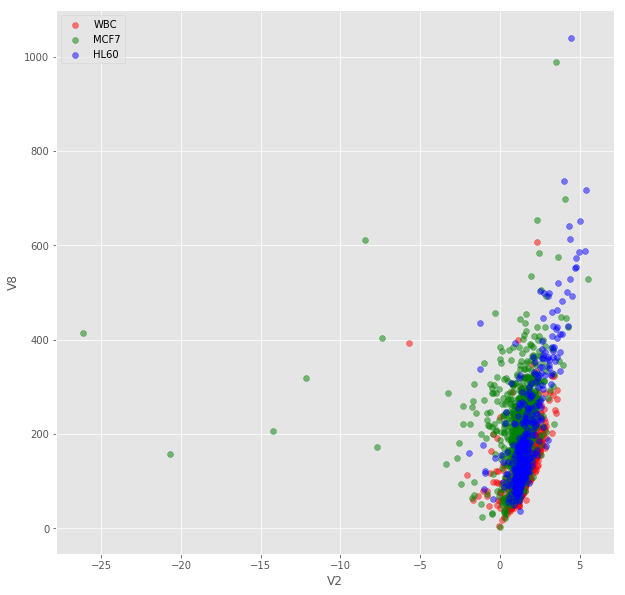

In [2]:
# Answer

# Choose variables to use
var = ['V2', 'V8']
var_index = [1, 7]
cell_types = ['WBC', 'MCF7', 'HL60']
cell_color = ['r', 'g', 'b']

# Identify the data for each cell type
is_wbc = mat.Sample == cell_types[0]
is_mcf7 = mat.Sample == cell_types[1]
is_hl60 = mat.Sample == cell_types[2]

# Create storage place for cell data
wbc_data = mat.loc[is_wbc]
mcf7_data = mat.loc[is_mcf7]
hl60_data = mat.loc[is_hl60]

# Convert data to matrix
wbc_data = wbc_data.values
mcf7_data = mcf7_data.values
hl60_data = hl60_data.values

plt.figure(figsize = (10, 10))
plt.scatter(wbc_data[:, var_index[0]], wbc_data[:, var_index[1]], c = cell_color[0], label = cell_types[0], alpha = 0.5)
plt.scatter(mcf7_data[:, var_index[0]], mcf7_data[:, var_index[1]], c = cell_color[1], label = cell_types[1], alpha = 0.5)  
plt.scatter(hl60_data[:, var_index[0]], hl60_data[:, var_index[1]], c = cell_color[2], label = cell_types[2], alpha = 0.5)
plt.legend()
plt.xlabel(var[0])
plt.ylabel(var[1])

plt.show()

There is an abundant amount of overlap between the 3 cell types when looking at the V2 adn V8 variables of the cell data. Because of this overlap, differentiating the different cell types is not trivial. 

#### (2) Use principal components analysis to visualize the variation in each variable. Plot the first two principal components against the cell type. Do you see better separation in this case? What does this tell you about your ability to distinguish the cell types?

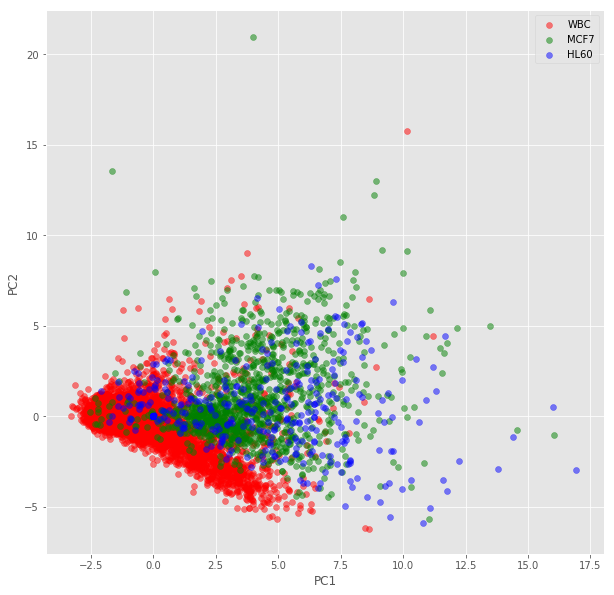

In [34]:
# Answer
from sklearn.decomposition import PCA
from scipy import stats

pca2 = PCA(n_components = 2)

# Store cell data in matrix
cell_data_mat = mat.drop('Sample', axis = 1)
cell_data = cell_data_mat.values

# Normalize the data
scaled_cell_data = stats.zscore(cell_data)
cell_data_pca2 = pca2.fit_transform(scaled_cell_data)
cell_data_pca2 = cell_data_pca2.T

# Sort the pca data based on cell type
wbc_pca2 = np.zeros((2, len(is_wbc)))
mcf7_pca2 = np.zeros((2, len(is_mcf7)))
hl60_pca2 = np.zeros((2, len(is_hl60)))
i_wbc = 0
i_mcf7 = 0
i_hl60 = 0

for i in range(cell_data_pca2.shape[1]):
    if is_wbc[i]:
        wbc_pca2[0, i_wbc] = cell_data_pca2[0, i]
        wbc_pca2[1, i_wbc] = cell_data_pca2[1, i]
        i_wbc += 1
        
    if is_mcf7[i]:
        mcf7_pca2[0, i_mcf7] = cell_data_pca2[0, i]
        mcf7_pca2[1, i_mcf7] = cell_data_pca2[1, i]
        i_mcf7 += 1
        
    if is_hl60[i]:
        hl60_pca2[0, i_hl60] = cell_data_pca2[0, i]
        hl60_pca2[1, i_hl60] = cell_data_pca2[1, i]
        i_hl60 += 1

# Plot data against PCs
plt.figure(figsize = (10, 10))
plt.scatter(wbc_pca2[0], wbc_pca2[1], c = cell_color[0], label = cell_types[0], alpha = 0.5)
plt.scatter(mcf7_pca2[0], mcf7_pca2[1], c = cell_color[1], label = cell_types[1], alpha = 0.5)
plt.scatter(hl60_pca2[0], hl60_pca2[1], c = cell_color[2], label = cell_types[2], alpha = 0.5)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

The data points are more spread out along the x-axis. This is expected because the x-axis is PC1, which is meant to have the maximum amount of variation. However, the data points are still overlapping a significant amount and the cell types are indistinguishable from each other.

#### (3) How does partial least squares fare in desciminating cancer and non-cancer cells (make cancer=1 and non-cancer=0; this is called PLS-DA)? How does this relate to the results in the previous questions?

In [35]:
# Define function to return array of combined boolean arrays
def combine_boolean_array(a_CBA, b_CBA):
    assert(len(a_CBA) == len(b_CBA))
    bool_array_CBA = np.zeros(len(a_CBA))
    
    for i in range(len(a_CBA)):
        bool_array_CBA[i] = a_CBA[i] or b_CBA[i]
        
    return bool_array_CBA

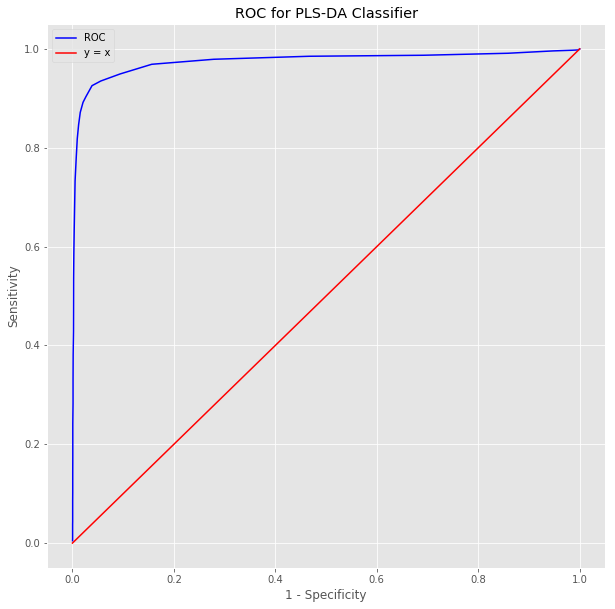

In [36]:
from sklearn.cross_decomposition import PLSRegression

is_wbc = np.asarray(is_wbc)
is_mcf7 = np.asarray(is_mcf7)
is_hl60 = np.asarray(is_hl60)

# WBC labels are non-cancer cells while MCF7 and HL60 are cancer cells
is_cancer = np.ravel(combine_boolean_array(is_mcf7, is_hl60))

# Run PLS-DA using 2 components to predict whether the cell is cancerous
plsr2 = PLSRegression(n_components = 2)
plsr2.fit_transform(scaled_cell_data, is_cancer)
plsr2_output = np.ravel(plsr2.predict(scaled_cell_data))

# Define function for classifying the outputs with a specific threshold
# Positive is defined has being cancerous
def classify_outputs(outputs_CO, threshold_CO):
    pred_labels_CO = np.zeros(len(outputs_CO))
    
    for i in range(len(outputs_CO)):
        if outputs_CO[i] < threshold_CO:
            pred_labels_CO[i] = 0
        else:
            pred_labels_CO[i] = 1
            
    return pred_labels_CO

# Define function for calculating sensitivty and selectivity for a classifier
def sensitivy_specificty(real_labels_SS, pred_labels_SS): 
    assert(len(real_labels_SS) == len(pred_labels_SS))
    fp_SS = 0
    tp_SS = 0
    fn_SS = 0
    tn_SS = 0

    for i in range(len(pred_labels_SS)):
        if pred_labels_SS[i] == 1:
            if pred_labels_SS[i] == real_labels_SS[i]:
                tp_SS += 1
            else:
                fp_SS += 1    
        else:
            if pred_labels_SS[i] == real_labels_SS[i]:
                tn_SS += 1
            else:
                fn_SS += 1        

    sensitivity_SS = tp_SS/(tp_SS + fn_SS)
    specificity_SS = tn_SS/(tn_SS + fp_SS)
    
    return [sensitivity_SS, specificity_SS]

# Generate an ROC plot
thresholds = np.linspace(-2, 2, 101)
sens_spec = np.zeros((len(thresholds), 2))

for i in range(len(thresholds)):
    pred_labels = classify_outputs(plsr2_output, thresholds[i])
    sens_spec[i] = sensitivy_specificty(is_cancer, pred_labels)
    
sens = sens_spec[:, 0]
spec = sens_spec[:, 1]

plt.figure(figsize = (10, 10))
plt.plot(1 - spec, sens, c = 'b', label = 'ROC')
plt.plot(np.array([0, 1]), np.array([0, 1]), c = 'r', label = 'y = x')
plt.title('ROC for PLS-DA Classifier')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend()

plt.show()

Looking at the ROC plot for the PLS-DA classifier, we can determine that the classifier does a very good job in classifying the cancer cells from wbc in comparison to the earlier methods used to distinguish the groupd from each other.

#### (4) Setup a support vector machine classifier (with linear kernel) to distinguish cancer and non-cancer.

Evaluate how well this performs (hint: think carefully about how you evaluate the model).

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

# Create SVM classifier with linear kernel
svm_linear = SVC(kernel = 'linear')

# 5-fold cv
score_linear = []
skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(scaled_cell_data, is_cancer):
    # Split data into training and test set
    x_train, x_test = scaled_cell_data[train_index], scaled_cell_data[test_index]
    y_train, y_test = is_cancer[train_index], is_cancer[test_index]
    
    svm_linear.fit(x_train, y_train)
    score_linear.append(svm_linear.score(x_test, y_test))
    
print('model classifying score:', np.mean(score_linear))

model classifying score: 0.9696300104787927


#### (5) Choose and justify your selection of a different kernel to use in SVM classification. (Hint: It should be a kernel with varying complexity, such as polynomial or RBF.)

In [38]:
# Define function for calculating svm score with or without cv
def svm_score_poly_cv(x_SSPC, y_SSPC, degree_SSPC):
    # Choose a poly kernel
    svm_poly_SSPC = SVC(kernel = 'poly', degree = degree_SSPC, gamma = 'auto')

    # 5-fold cv
    score_poly_SSPC = []

    skf_poly_SSPC = StratifiedKFold(n_splits = 5)
    for train_index, test_index in skf_poly_SSPC.split(x_SSPC, y_SSPC):
        x_train, x_test = x_SSPC[train_index], x_SSPC[test_index]
        y_train, y_test = y_SSPC[train_index], y_SSPC[test_index]

        svm_poly_SSPC.fit(x_train, y_train)
        score_poly_SSPC.append(svm_poly_SSPC.score(x_test, y_test))

    return np.mean(score_poly_SSPC)

print('score for polynomial model:', svm_score_poly(scaled_cell_data, is_cancer, 3))

def svm_score_poly_no_cv(x_SSPNC, y_SSPNC, degree_SSPNC):
    # Choose a poly kernel
    svm_poly_SSPNC = SVC(kernel = 'poly', degree = degree_SSPNC, gamma = 'auto')

    score_poly_SSPNC = []

    svm_poly_SSPNC.fit(x_SSPNC, y_SSPNC)
    score_poly_SSPNC.append(svm_poly_SSPNC.score(x_SSPNC, y_SSPNC))

    return np.mean(score_poly_SSPNC)

print('score for polynomial model:', svm_score_poly_no_cv(scaled_cell_data, is_cancer, 3))

score for polynomial model: 0.961023102310231
score for polynomial model: 0.9810051444400475


The polynomial kernel was chosen for the SVM because it is more complicated than the linear kernel and easier to manipulate complexity than the RBF. Functions for calculating score make sense because cv yields a lower score.

#### (6) Vary the complexity of your kernel and evaluate the ability of it to descriminate data both directly and on crossvalidation.

How does the answer of which classification strategy vary based on whether you are performing cross-validation?

In [50]:
# Answer
# Loop w/ cv and w/o cv
    # Loop different complexity
        # Fit and evaluate your model
# Choose the best two

# Polynomial complexity
highest_deg = 5
poly_degs = np.linspace(2, highest_deg, highest_deg - 1)

# Make lists to store scores of models in
scores_cv = []
scores_no_cv = []

# Calculate scores for cross validation scoring and direct scoring
print('deg   score with no cv     score with cv')
for deg in poly_degs:
    score_no_cv = svm_score_poly_no_cv(scaled_cell_data, is_cancer, deg)
    score_cv = svm_score_poly_cv(scaled_cell_data, is_cancer, deg)
    
    scores_no_cv.append(score_no_cv)
    scores_cv.append(score_cv)
    print(deg, ' ', score_no_cv, ' ', score_cv)

# print(scores_no_cv)
# print(scores_cv)
best_deg = 3

deg   score with no cv     score with cv
2.0   0.9682429758607044   0.9555808874656012
3.0   0.9810051444400475   0.961023102310231
4.0   0.980807281361298   0.9538993840036823
5.0   0.981994459833795   0.9516241149337485


As expected, when scoring the SVM based on the data it was trained with the polynomial with the highest degree used for the kernel yielded the highest score. However, when cross validation is done on the model, the score begins to fall after polynomial of degree 3. This is due to the SVM being too complex and overfitting the data.

#### (7) Your experimental collaborator asks you to determine whether she can collect a fewer number of measurements (cells) and still obtain the same classification efficiency when building a new estimator. How might you determine this? Can she?

The first step would be to create a new subset of the original set of data. The data of the subset should be chosen randomly, but this causes a problem to arise when there is an unequal ratio of cell types from the original set. This may cause the estimator to be poorly trained because it does not have enough cancer cells to train off of. In order to solve for this, you should choose a subset of measurements from each cell line. Then, combine these 3 subset into the subset that will train the SVM. Do this over multiple folds and varying subset size to get close to the original model score. If there is no score that is close to the original, trimming data set will not work. 

#### (8) What if you can change the numbers of individual cell types that you collect? Is the model you obtain sensitive to the number of cells in each group to the same extent? Try this with one cell population.

In [70]:
# Create subset of cell data with few WB cells
subset_no_wbc_is_cancer = is_cancer[8000:]
subset_no_wbc_cell_data = cell_data[8000:]
scaled_subset_no_wbc_cell_data = stats.zscore(subset_no_wbc_cell_data)

# Create subset of cell data with few cancer cells
subset_no_cancer_is_cancer = is_cancer[:9000]
subset_no_cancer_cell_data = cell_data[:9000]
scaled_subset_no_cancer_cell_data = stats.zscore(subset_no_cancer_cell_data)

# Calculate score of SVM trained on subsets
score_cv_subset_no_wbc = svm_score_poly_cv(scaled_subset_no_wbc_cell_data, subset_no_wbc_is_cancer, best_deg)
score_cv_subset_no_cancer = svm_score_poly_cv(scaled_subset_no_cancer_cell_data, subset_no_cancer_is_cancer, best_deg)

print('score of svm trained on subset with no wbc:', score_cv_subset_no_wbc)
print('score of svm trained on subset with no cancer cells:', score_cv_subset_no_cancer)

score of svm trained on subset with no wbc: 0.9795937711577523
score of svm trained on subset with no cancer cells: 0.9729997492454645


In [71]:
# Create SVM trained on few WB cells
svm_poly_3_no_wbc = SVC(kernel = 'poly', degree = best_deg, gamma = 'auto')

svm_poly_3_no_wbc.fit(scaled_subset_no_wbc_cell_data, subset_no_wbc_is_cancer)
score_poly_3_no_wbc = (svm_poly_3.score(scaled_cell_data, is_cancer))

# Create SVM trained on few cancer cells
svm_poly_3_no_cancer = SVC(kernel = 'poly', degree = best_deg, gamma = 'auto')

svm_poly_3_no_cancer.fit(scaled_subset_no_cancer_cell_data, subset_no_cancer_is_cancer)
score_poly_3_no_cancer = (svm_poly_3.score(scaled_cell_data, is_cancer))

print('score of svm trained on subset with no wbc:', score_poly_3_no_wbc)
print('score of svm trained on subset with no cancer cells:', score_poly_3_no_cancer)

score of svm trained on subset with no wbc: 0.24465769687376335
score of svm trained on subset with no cancer cells: 0.24465769687376335


At first it appeared that the model did much better when trained on a subset with very few of one type of cell. However, the score for these models were evaluated using cross validation using the same set they were trained on. This would overestimate the score of the SVM. To investigate this, a created SVMs trained on the same subset of cell data, but when the SVMs were scored, they were scored using the original data set. This yielded much lower scores as we would expect.

#### (9) Your collaborator collects completely new data and brings it to you for classification. You take your chosen optimal model from (6) and classify each cell. Would you expect your model to perform better, identically, or worse than before? Why?

I would expect the model to perform worse. This is because the SVM was trained on a data set that was similar to the data it was tested to score the model. This behavior can be seen when we scored the model on the same data it was trained on in (6) doing cross validation. When the data set was exactly the same, the score was higher than when the data set used to score was different fom cross validation. I can predict that when the training set is significantly different from new data the model will perform very poorly as seen in (8). 

#### (10) As a prior distribution, assume that, among patients coming in for testing, 99% are cancer-free in the end. Estimate how well your assay needs to perform to confidently identify cancer patients.

P(+cancer|+assay) = P(+assay|+cancer)P(+cancer)/P(+assay)
Where P(+cancer) = 1%; P(+assay) = P(+assay|+cancer)P(+cancer) + P(+assay|-cancer)P(-cancer)
We want P(+cancer|+assay) to be maximize -> as close to 1 as possible -> 95%.

In [82]:
# Define variables for Bayesian analysis
p_neg_cancer = 0.99
p_pos_cancer = 1 - p_neg_cancer

p_pos_cancer_given_pos_assay = 0.95

# p_pos_assay_given_pos_cancer = sensitivity
# p_pos_assay_given_neg_cancer = 1 - specificity

def needed_specificity_with_sensitivity_of(sens_NSWSO):
    # spec = a * sens + b
    a = (p_pos_cancer_given_pos_assay - 1) * p_pos_cancer/(p_pos_cancer_given_pos_assay * p_neg_cancer)
    b = p_pos_cancer_given_pos_assay * p_neg_cancer
    
    return (a * sens_NSWSO + b)

print('specificty:', needed_specificity_with_sensitivity_of(0.95))

specificty: 0.9399949494949495


I end up getting a single equation with two unknowns where I need the sensitivty to determine the specificty of assay. I wrote a function that would calculate the specificity I need from my assay if it were to have a specific sensitivity. For the case above, if the assay had a sensitivity of 95%, the assay needs to have a specificity of 94%.